In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True



In [2]:
credit = pd.read_csv('credit_card.csv')

credit.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [3]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [4]:
df_credit1 = credit.drop(['Customer Key'], axis=1)
df_credit1.head()

,Sl_No,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,100000,2,1,1,0
1,2,50000,3,0,10,9
2,3,50000,7,1,3,4
3,4,30000,5,1,1,4
4,5,100000,6,0,12,3


In [5]:
df_credit = df_credit1.drop(['Sl_No'], axis=1)
df_credit.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<Axes: >

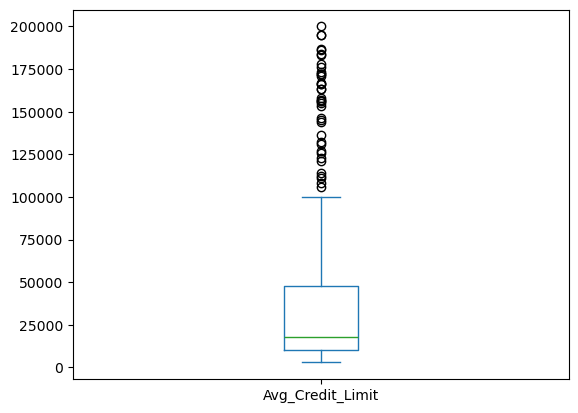

In [6]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

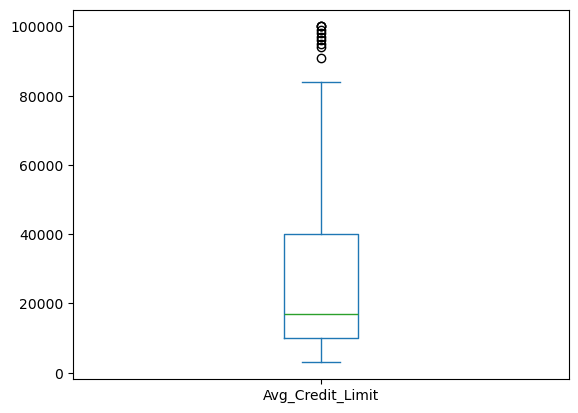

In [7]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    for col_name in kolom_outlier:
        if is_numeric_dtype(data_frame[col_name]):
            q1 = data_frame[col_name].quantile(0.25)
            q3 = data_frame[col_name].quantile(0.75)
            iqr = q3 - q1
            batas_bawah = q1 - (1.5 * iqr)
            batas_atas = q3 + (1.5 * iqr)
            
            # Filter data to exclude outliers
            data_frame = data_frame.loc[(data_frame[col_name] >= batas_bawah) & (data_frame[col_name] <= batas_atas)]
            
    return data_frame

# Pastikan untuk memberikan daftar kolom pada parameter kolom_outlier
data_bersih = remove_outlier(df_credit, kolom_outlier=['Avg_Credit_Limit'])

print("Jumlah data sebelum outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

# Memperbaiki kesalahan pada plot
data_bersih['Avg_Credit_Limit'].plot(kind='box')


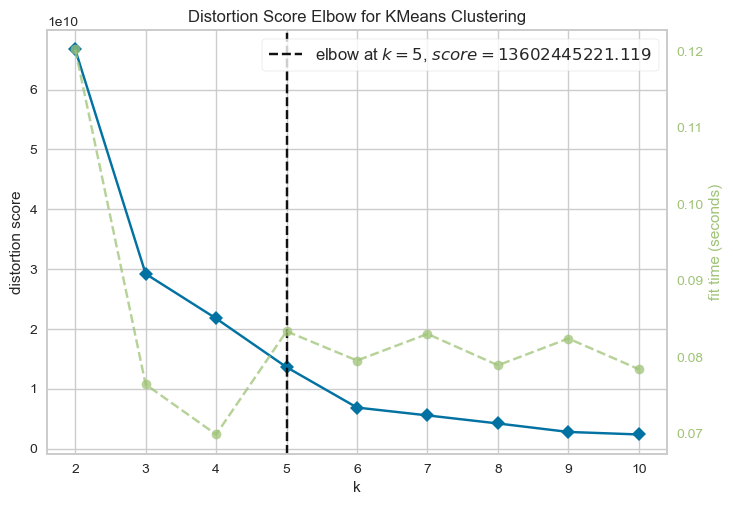

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=83)
vis = KElbowVisualizer(kMeansC,k=(2,11))

vis.fit(data_bersih)

vis.show()

Silhouette Score K-Means for 2 clusters: 0.7275517813087928
Silhouette Score K-Means for 3 clusters: 0.7077390094589705
Silhouette Score K-Means for 4 clusters: 0.5776544162725104
Silhouette Score K-Means for 5 clusters: 0.595698517955002
Silhouette Score K-Means for 6 clusters: 0.6178729947858173
Silhouette Score K-Means for 7 clusters: 0.5950185929146289
Silhouette Score K-Means for 8 clusters: 0.6075810437922412
Silhouette Score K-Means for 9 clusters: 0.6137175559548322
Silhouette Score K-Means for 10 clusters: 0.6038010076480274


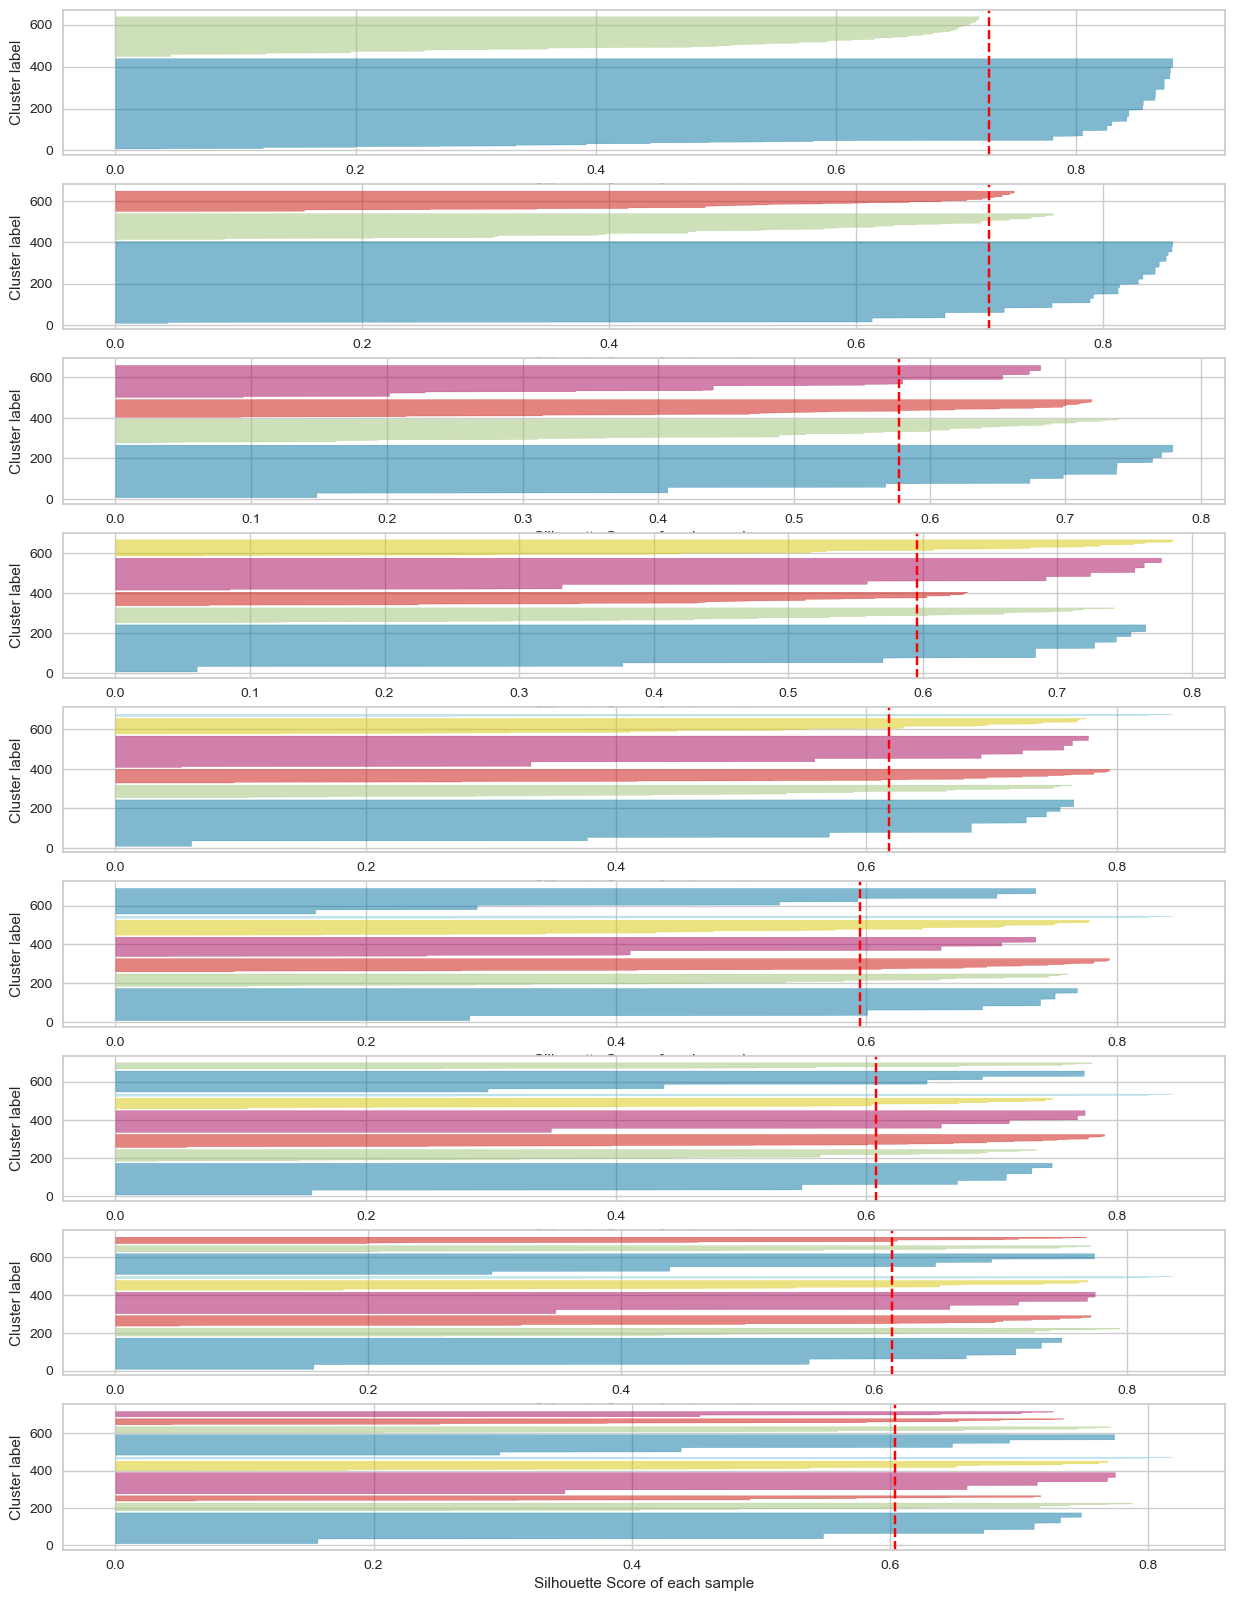

In [9]:
from yellowbrick.cluster import SilhouetteVisualizer  # Perbaikan pada 'clusster' menjadi 'cluster'

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(9, 1, figsize=(15, 20))

for k in np.arange(2, 11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=83)
    KM_clusters = kMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Means for", k, "clusters:", silhouette_score(data_bersih, KM_clusters))
    
    # Visualize the silhouette score
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih)

    # Set labels for the subplot
    ax[k-2].set(xlabel="Silhouette Score of each sample", ylabel="Cluster label")


In [10]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

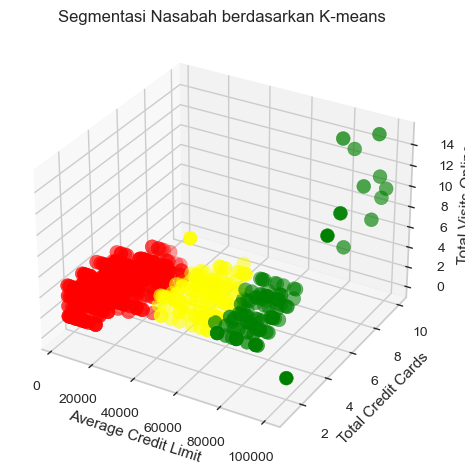

Silhouette Score K-Means: 0.708


In [11]:
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 83)
K_clusters = kmeans. fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4:'magenta', 5:'bleck',6:'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

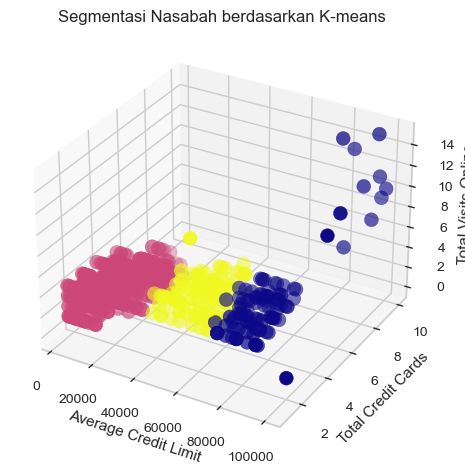

Silhouette Score K-Means: 0.708


In [12]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan K-means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

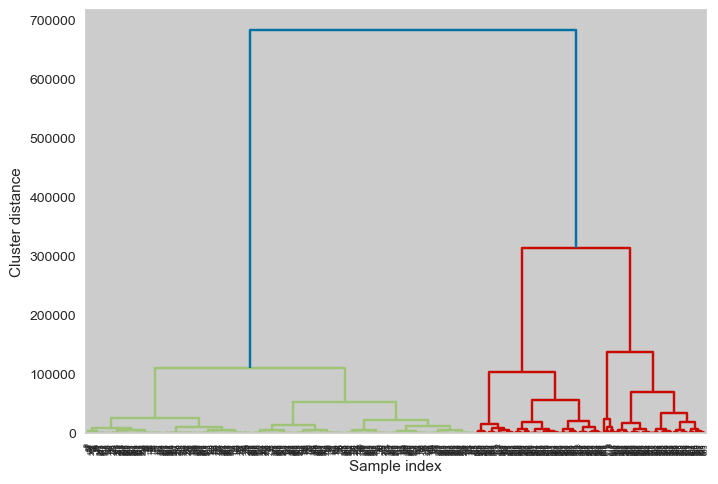

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

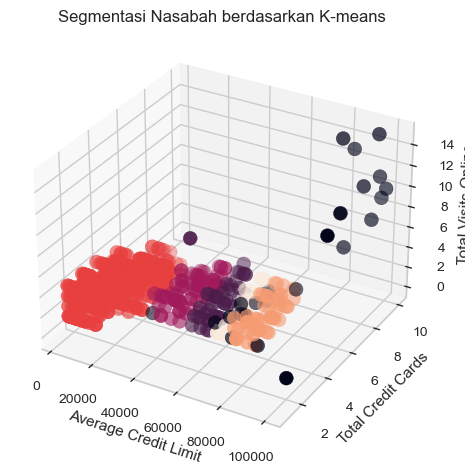

Silhouette Score K-Means: 0.708


In [14]:
DBSC = DBSCAN(min_samples=20,eps=2500)


DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan K-means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

In [15]:
import pickle

with open('KMeans_model.pkl','wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl','wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl','wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
